<a href="https://colab.research.google.com/github/SiddhantKadwe/TechLab/blob/Maroof/Driver_Drowsiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.utils import load_img
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -uq "/content/drive/MyDrive/Driver_Drowsiness/Driver_Drowsiness_Dataset.zip"

Mounted at /content/drive


In [4]:
input_path, label, file_name, person_ID = [], [], [], []

pattern = re.compile(r'^[a-zA-Z][a-zA-Z]?') #identification criteria of participant

for class_name in os.listdir("Driver Drowsiness Dataset (DDD)"):  #goes through all folders in DDD folder
  for path in os.listdir("Driver Drowsiness Dataset (DDD)/"+class_name):  #goes through all files in both folders and updates file path and labels
    if class_name == 'Drowsy':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("Driver Drowsiness Dataset (DDD)", class_name, path))
    file_name.append(path)

    person_ID.append(pattern.findall(path)[0])  #identification of participant

print(input_path[0], label[0], file_name[0], person_ID[0])

Driver Drowsiness Dataset (DDD)/Drowsy/A0307.png 0 A0307.png A


In [5]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df['name'] = file_name
df['person'] = person_ID
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

images  label        name person
0   Driver Drowsiness Dataset (DDD)/Drowsy/N0857.png      0   N0857.png      N
1   Driver Drowsiness Dataset (DDD)/Drowsy/O0602.png      0   O0602.png      O
2   Driver Drowsiness Dataset (DDD)/Drowsy/I0746.png      0   I0746.png      I
3  Driver Drowsiness Dataset (DDD)/Non Drowsy/zc0...      1  zc0433.png     zc
4   Driver Drowsiness Dataset (DDD)/Drowsy/H0425.png      0   H0425.png      H
5  Driver Drowsiness Dataset (DDD)/Non Drowsy/j06...      1   j0698.png      j
6   Driver Drowsiness Dataset (DDD)/Drowsy/C0129.png      0   C0129.png      C
7  Driver Drowsiness Dataset (DDD)/Non Drowsy/a11...      1   a1128.png      a
8  Driver Drowsiness Dataset (DDD)/Non Drowsy/d03...      1   d0391.png      d
9  Driver Drowsiness Dataset (DDD)/Non Drowsy/zb0...      1  zb0068.png     zb

In [12]:
df.groupby('label').size()

label
0    22348
1    19445
dtype: int64

In [13]:
df.groupby('person').size()

person
A     1411
B      315
C      335
D      179
E      962
F      415
G      499
H      508
I     1095
J      474
K      630
L      732
M      777
N     1156
O     1097
P      963
Q      562
R      204
S      487
T      933
U      420
V      653
W     1162
X     1749
Y     1112
ZA     621
ZB    1551
ZC    1346
a     1252
b      409
c      400
d     1005
e     1000
g      109
h      571
i     1045
j      717
k      538
l      381
m      473
n      957
o      671
p      190
q      521
r      522
s      457
u      510
v     1002
w      493
x     1143
y     1500
za    1054
zb    1237
zc    1288
dtype: int64

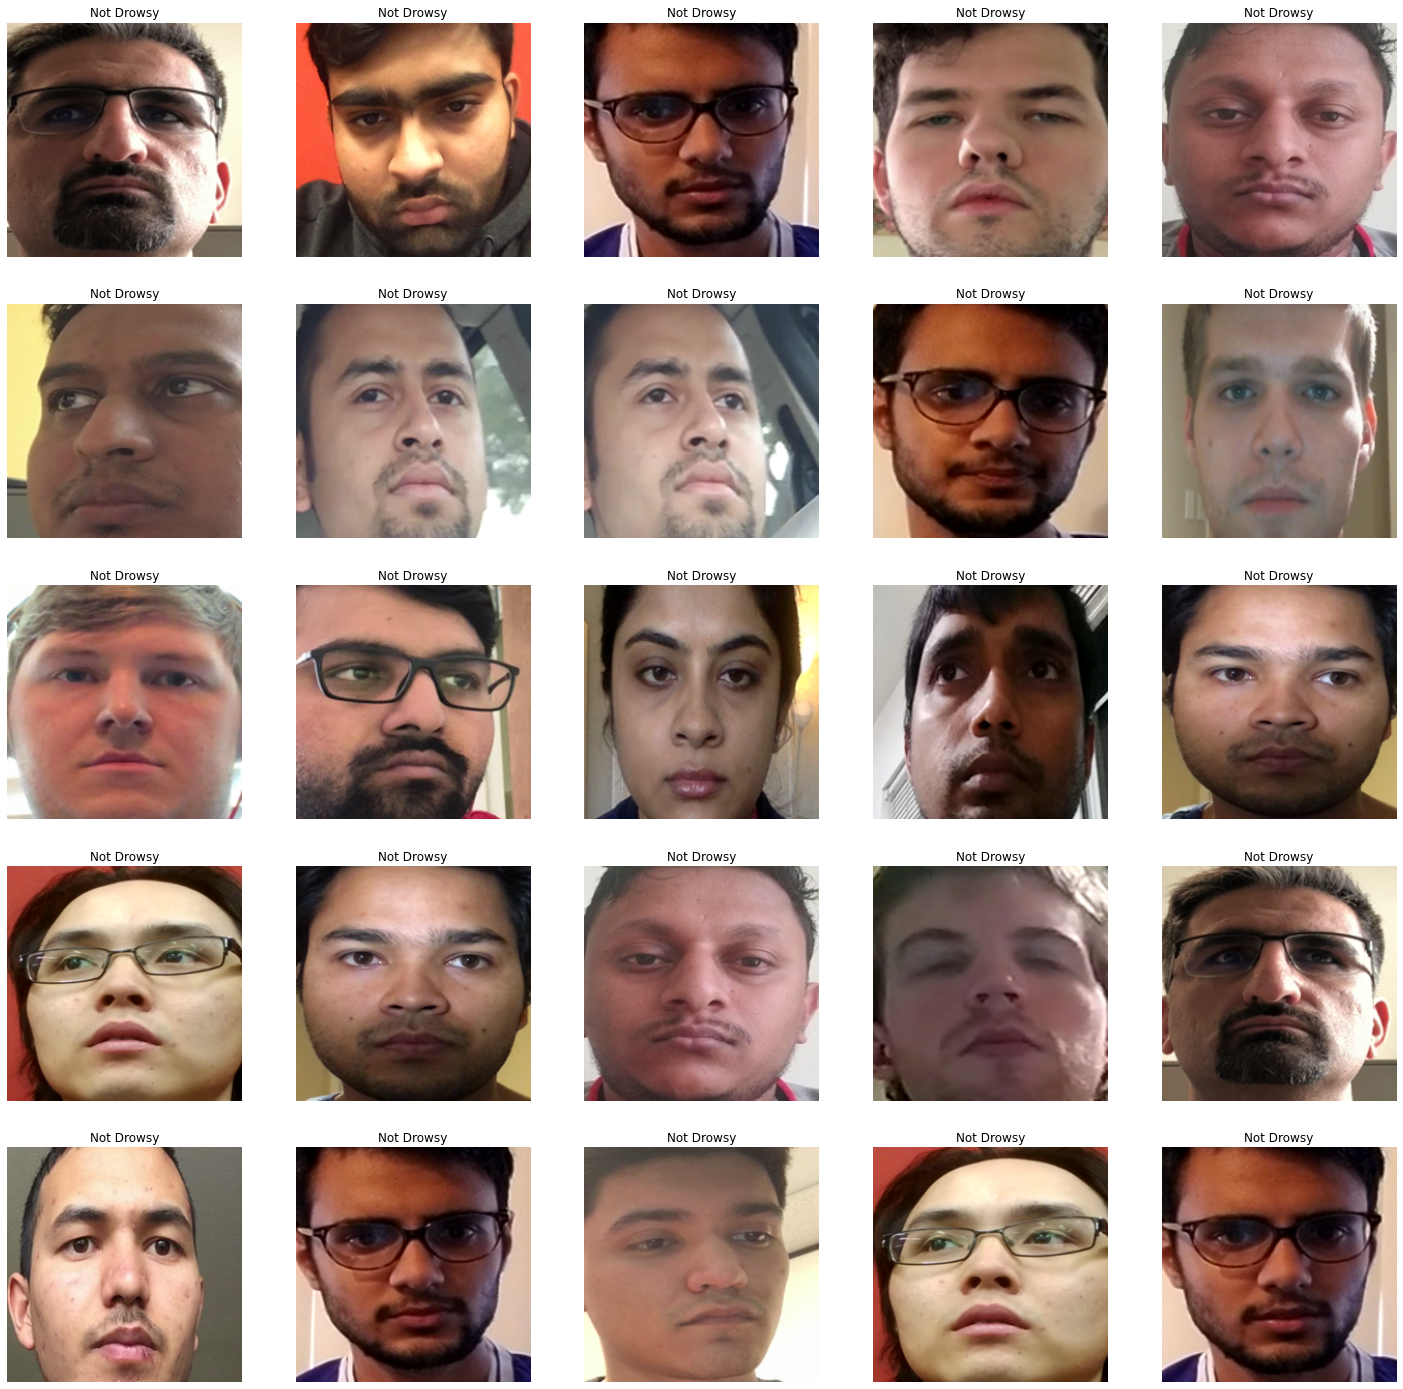

In [6]:
plt.figure(figsize=(25,25))
#temp = df[df['label']==1]['images']   
temp = df.loc[df['label']==1,'images']  #assign all NOT DROWSY image paths to a temp variable
start = random.randint(0, len(temp))
files = temp[start:start+25]  #selection of 25 random images for plotting

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("Not Drowsy")
  plt.axis('off')

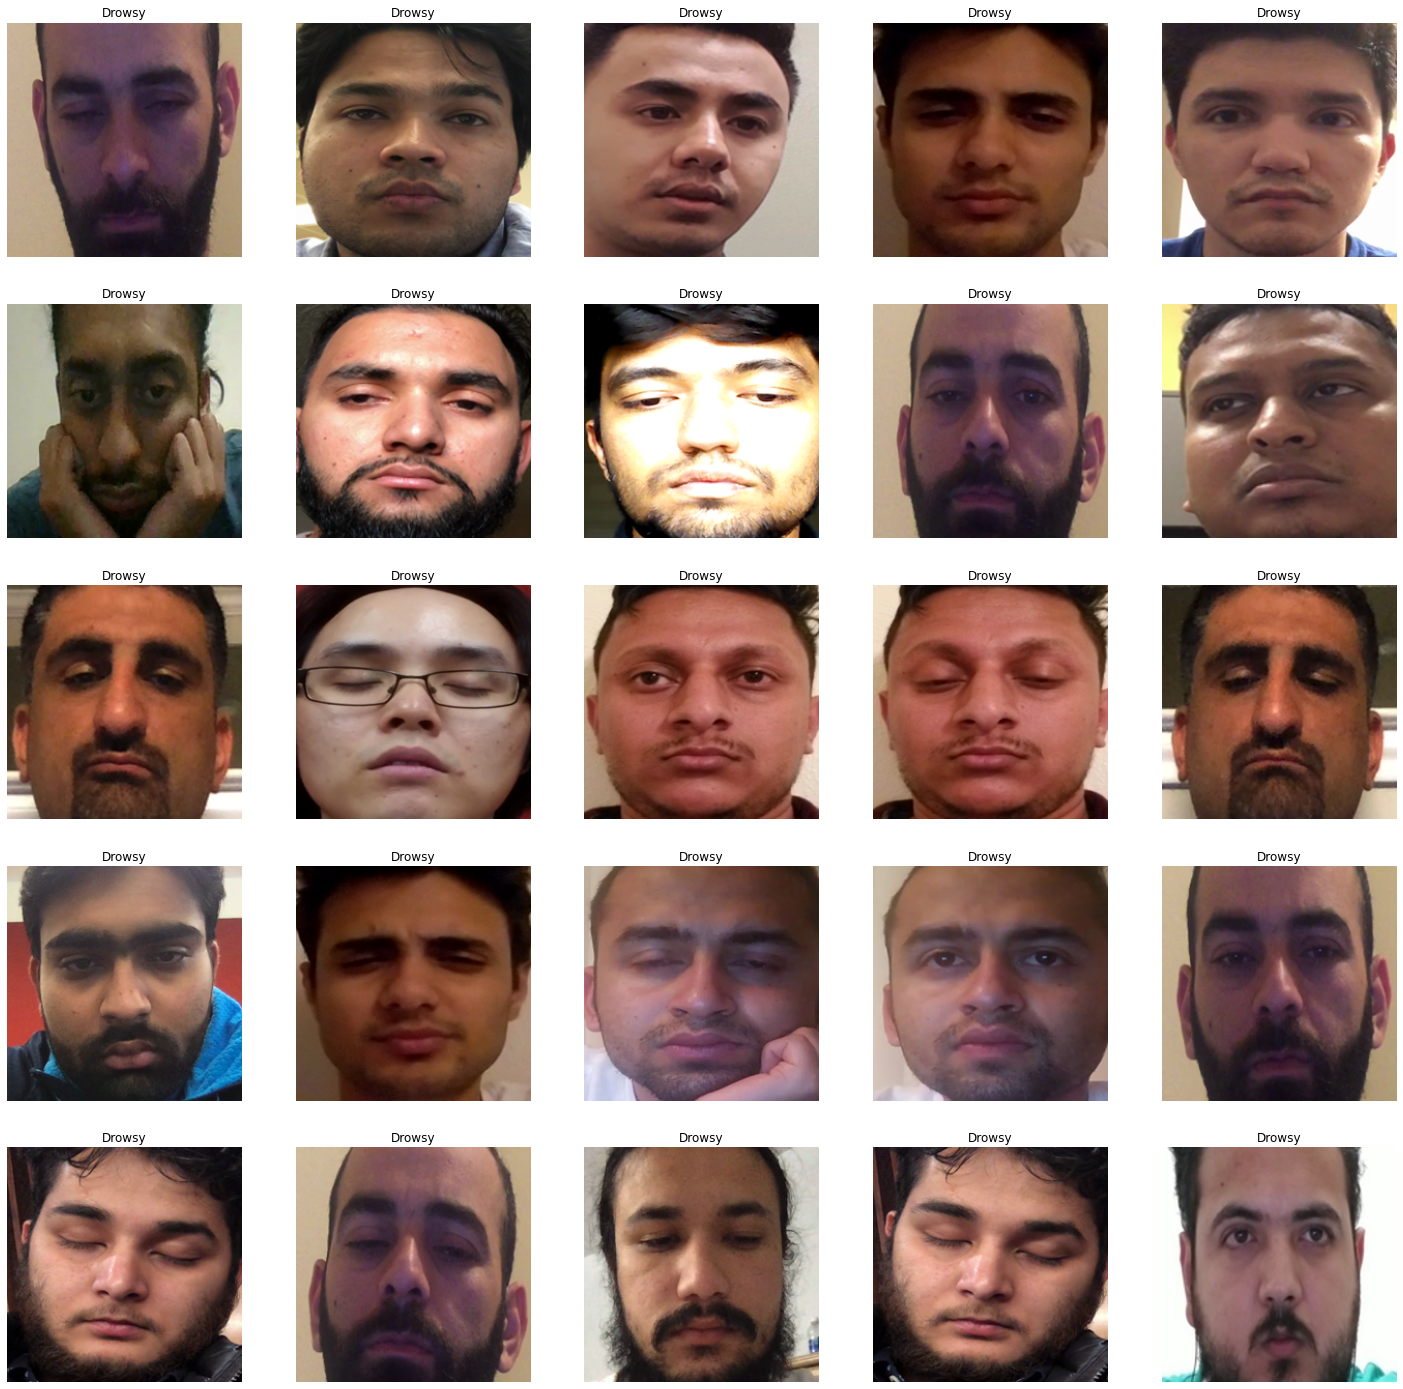

In [7]:
plt.figure(figsize=(25,25))
temp = df.loc[df['label']==0,'images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("Drowsy")
  plt.axis('off')

In [ ]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=1234)